# Preparing the Evidence Inference Dataset

In [1]:
import pooch
import pandas as pd
from pathlib import Path
from tqdm.auto import tqdm
from evaluation.plotting import set_size
import matplotlib.pyplot as plt

plt.style.use("../../thesis.mplstyle")

In [2]:
PATH_LATEX_PLOT_OUTPUT = Path("../../thesis/from_python/figures/classification/")
PATH_LATEX_PLOT_OUTPUT.mkdir(exist_ok=True, parents=True)

PATH_LATEX_TABLE_OUTPUT = Path("../../thesis/from_python/tables/classification/")
PATH_LATEX_TABLE_OUTPUT.mkdir(exist_ok=True, parents=True)

### Download dataset

In [3]:
ei_dataset_files = pooch.retrieve(
    url="http://evidence-inference.ebm-nlp.com/v2.0.tar.gz",
    known_hash="6abe0d4ec0d331834981c0171c3c79d47515761867f82f1dc6066e43863a1586",
    processor=pooch.Untar(),
)

### Merging Annotations and Prompts

In [4]:
annotations = pd.read_csv(
    list(filter(lambda p: "annotations_merged.csv" in p, ei_dataset_files))[0],
    index_col=0,
)
annotations.head()

,PromptID,PMCID,Valid Label,Valid Reasoning,Label,Annotations,Label Code,In Abstract,Evidence Start,Evidence End
UserID,,,,,,,,,,
0,213,2206488,True,True,no significant difference,IL-6r (ng/ml)\t\t\t\t\t\t\t Group A\t43.6 (1.7...,0,False,-1,-1
1,213,2206488,True,True,no significant difference,"There was no significant difference in IL 6, I...",0,True,1612,1708
3,213,2206488,True,True,no significant difference,"There was no significant difference in IL 6, I...",0,True,1612,1707
2,213,2206488,True,True,no significant difference,"There was no significant difference in IL 6, I...",0,True,1612,1707
0,98,2858204,True,True,significantly increased,"After two weeks of treatment, the reduction in...",1,True,18239,18338


In [5]:
prompts = pd.read_csv(
    list(filter(lambda p: "prompts_merged.csv" in p, ei_dataset_files))[0]
)
prompts.head()

,PromptID,PMCID,Outcome,Intervention,Comparator
0,213,2206488,IL-6r (ng/ml),dextran-70 infusion was administered at a dose...,identical amounts of gelatin infusion
1,98,2858204,downsizing of ucler area 2 weeks after treatment,HBOT,placebo
2,150,2871176,Incidence of minor hypoglycaemia,Liraglutide (1.2 mg) plus glimepiride,Rosiglitazone plus glimepiride
3,191,2517154,Dysmenorrhea scores,Infliximab,Placebo
4,113,2871176,Patients reaching HbA1c goals less than 7.0% a...,Liraglutide (1.8 mg) plus glimepiride,Rosiglitazone plus glimepiride


In [6]:
df = annotations.merge(
    prompts, on=["PMCID", "PromptID"]
)  # .set_index(["PMCID", "PromptID"])
df

,PromptID,PMCID,Valid Label,Valid Reasoning,Label,Annotations,Label Code,In Abstract,Evidence Start,Evidence End,Outcome,Intervention,Comparator
0,213,2206488,True,True,no significant difference,IL-6r (ng/ml)\t\t\t\t\t\t\t Group A\t43.6 (1.7...,0,False,-1,-1,IL-6r (ng/ml),dextran-70 infusion was administered at a dose...,identical amounts of gelatin infusion
1,213,2206488,True,True,no significant difference,"There was no significant difference in IL 6, I...",0,True,1612,1708,IL-6r (ng/ml),dextran-70 infusion was administered at a dose...,identical amounts of gelatin infusion
2,213,2206488,True,True,no significant difference,"There was no significant difference in IL 6, I...",0,True,1612,1707,IL-6r (ng/ml),dextran-70 infusion was administered at a dose...,identical amounts of gelatin infusion
3,213,2206488,True,True,no significant difference,"There was no significant difference in IL 6, I...",0,True,1612,1707,IL-6r (ng/ml),dextran-70 infusion was administered at a dose...,identical amounts of gelatin infusion
4,98,2858204,True,True,significantly increased,"After two weeks of treatment, the reduction in...",1,True,18239,18338,downsizing of ucler area 2 weeks after treatment,HBOT,placebo
...,...,...,...,...,...,...,...,...,...,...,...,...,...
24681,13889,4105274,True,True,no significant difference,the knee flexion range of motion of the patien...,0,False,17445,17744,knee flexion range of motion,With gabapentin,Without gabapentin
24682,13890,4889182,True,True,no significant difference,"Examining 7‐day page views (Table&nbsp;3), the...",0,False,14443,14619,number of page views in the social media group,social media exposure,no social media exposure (control)
24683,13890,4889182,True,True,no significant difference,"Examining 7‐day page views (Table 3), there wa...",0,False,14443,14619,number of page views in the social media group,social media exposure,no social media exposure (control)
24684,13891,3398966,True,True,significantly decreased,"Overall, 86 (9.9%) intervention participants a...",-1,False,43505,43760,Mortality,the HQP model of community-based nurse care ma...,the usual care afforded to traditional Medicar...


In [7]:
df["PMCID"].nunique()

3346

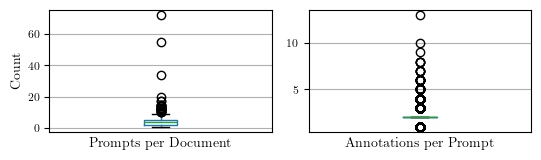

In [22]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=set_size("thesis", subplots=(1, 2)))

df.groupby("PMCID")["PromptID"].nunique().to_frame().boxplot(
    ax=axs[0], xlabel="Prompts per Document", ylabel="Count"
)
axs[0].set_xticks([])
axs[0].set_xticklabels([])

df.groupby(["PMCID", "PromptID"]).size().to_frame().boxplot(
    ax=axs[1], xlabel="Annotations per Prompt"
)
axs[1].set_xticks([])
axs[1].set_xticklabels([])
axs[1].set_ylabel("")

fig.tight_layout()
fig.savefig(str(PATH_LATEX_PLOT_OUTPUT / "prompts_per_document.pdf"))

In [11]:
df.groupby("PMCID")["PromptID"].nunique().describe()

count    3346.000000
mean        3.770472
std         2.464439
min         1.000000
25%         2.000000
50%         4.000000
75%         5.000000
max        72.000000
Name: PromptID, dtype: float64

In [13]:
df.groupby("PMCID")["PromptID"].nunique().describe().median()

3.8852361028093245

In [14]:
df.groupby(["PMCID", "PromptID"]).size().to_frame().describe().median()

0    2.0
dtype: float64

### Pre-defined splits

In [9]:
splits_dir = Path(list(filter(lambda p: "splits/" in p, ei_dataset_files))[0]).parent

splits = {}
for name in ["train", "test", "validation"]:
    pmcids = [
        int(i) for i in (splits_dir / f"{name}_article_ids.txt").read_text().split("\n")
    ]
    for pmcid in pmcids:
        splits[pmcid] = name

df["Split"] = df["PMCID"].apply(lambda r: splits[r])

### Load texts

The abstracts are provided as separate files, we therefore need to parse them:

In [10]:
abstracts_dir = Path(
    list(filter(lambda p: "txt_files/" in p, ei_dataset_files))[0]
).parent

df["Abstract Path"] = df["PMCID"].apply(lambda r: abstracts_dir / f"PMC{r}.txt")

In [11]:
tqdm.pandas(desc="Parsing abstracts")
df["Text"] = df["Abstract Path"].progress_apply(
    lambda p: p.read_text() if p.exists() else pd.NA
)
df.drop(columns="Abstract Path", inplace=True)

Parsing abstracts:   0%|          | 0/24686 [00:00<?, ?it/s]

### Identify cases where evidence is really in the abstract

We identify all cases where the document's text actually contains an ABSTRACT section:

In [12]:
df["Contains Abstract Section"] = df["Text"].str.contains(
    r"ABSTRACT\.\w+[\s\w+]*:[\s\S]*?(?=\n{2,})", na=False, regex=True
)

In [13]:
df["Text available"] = df["Text"].replace("", pd.NA).notnull()

In [14]:
crosstab = pd.crosstab(
    df["Contains Abstract Section"], df["Text available"], margins=True
)
crosstab.style.to_latex(
    PATH_LATEX_TABLE_OUTPUT / "text_vs_abstract.tex", hrules=True, siunitx=True
)
crosstab

Text available,False,True,All
Contains Abstract Section,,,
False,29,10542,10571
True,0,14115,14115
All,29,24657,24686


In [15]:
crosstab_doc = pd.crosstab(
    df.drop_duplicates("PMCID")["Contains Abstract Section"],
    df.drop_duplicates("PMCID")["Text available"],
    margins=True,
)
crosstab_doc.style.to_latex(
    PATH_LATEX_TABLE_OUTPUT / "text_vs_abstract_docs.tex", hrules=True, siunitx=True
)
crosstab_doc

Text available,False,True,All
Contains Abstract Section,,,
False,1,1627,1628
True,0,1718,1718
All,1,3345,3346


In [16]:
df_abs = df.query("`Contains Abstract Section`").copy()

#### Identifying the abstracts

In some texts, the abstract can be identified by the `ABSTRACT.` prefix among the section titles. In those cases, it is possible to identify the index of the end of the abstract as the position of the last character before the first title that does not contain the prefix. Here is an example:

In [17]:
from typing import Pattern
import re


def get_abstract_paragraph_idxs(full_text: str, pattern: Pattern | None = None):
    if pattern is None:
        pattern = re.compile(
            r"(ABSTRACT\.\w+[\s\w+]*:[\s\S]*?)(?=\n{2,})", re.MULTILINE
        )
    matches = [(m.start(0), m.end(0)) for m in re.finditer(pattern, full_text)]
    return matches


def get_abstract_start_end_idxs(full_text: str, pattern: Pattern | None = None):
    matches = get_abstract_paragraph_idxs(full_text, pattern)
    return matches[0][0], matches[-1][-1]


def extract_abstract(full_text: str, pattern: Pattern | None = None):
    matches = get_abstract_paragraph_idxs(full_text, pattern)
    return full_text[matches[0][0] : matches[-1][-1]]

In [18]:
sample = df_abs.sample(1, random_state=42)

In [19]:
print(sample["Text"].item())

TITLE: Inadvertent Introduction of Tissue Coring Into Joints During Arthrocentesis: An Experimental Study

  ABSTRACT.BACKGROUND:
The aim of this study was to investigate whether needles introduce skin plugs into joints during arthrocentesis.

ABSTRACT.MATERIAL/METHODS:
In the first part of this study, the arthrocentesis site was scrubbed with a fluorescein sodium swab, and 90 needles were inserted through the joint tissue and collected for examination under a fluorescence microscope. In the second part of this study, the joints were injected using 720 needles of different gauges. Two different randomly assigned needle insertion techniques were used: needle insertion straight through the joint capsule (subgroup 1) or insertion of the needle into the subcutaneous tissue followed by flushing of the needle with 0.5 mL of 0.9% normal saline prior to advancing the needle through the joint capsule (subgroup 2).

ABSTRACT.RESULTS:
Of the 90 needle tips examined in the first part of this study

In [20]:
print(extract_abstract(sample["Text"].item()))

ABSTRACT.BACKGROUND:
The aim of this study was to investigate whether needles introduce skin plugs into joints during arthrocentesis.

ABSTRACT.MATERIAL/METHODS:
In the first part of this study, the arthrocentesis site was scrubbed with a fluorescein sodium swab, and 90 needles were inserted through the joint tissue and collected for examination under a fluorescence microscope. In the second part of this study, the joints were injected using 720 needles of different gauges. Two different randomly assigned needle insertion techniques were used: needle insertion straight through the joint capsule (subgroup 1) or insertion of the needle into the subcutaneous tissue followed by flushing of the needle with 0.5 mL of 0.9% normal saline prior to advancing the needle through the joint capsule (subgroup 2).

ABSTRACT.RESULTS:
Of the 90 needle tips examined in the first part of this study, 21 had high-grade fluorescein contamination. In the second part of this study, the incidence of tissue, epi

#### Identifying invalid `In Abstract` labels

In [21]:
tqdm.pandas(desc="Finding abstract boundaries")
df_abs["Abstract Start"], df_abs["Abstract End"] = zip(
    *df_abs["Text"].progress_apply(get_abstract_start_end_idxs)
)

Finding abstract boundaries:   0%|          | 0/14115 [00:00<?, ?it/s]

In [22]:
df_abs["Abstract"] = df_abs.apply(
    lambda r: r["Text"][r["Abstract Start"] : r["Abstract End"]], axis=1
)

We can remove all cases where `Evidence End` is greater than the end of the abstract we identified (`Abstract End`), as these seem to be falsely labelled.

In [23]:
df_abs["In Abstract (identified)"] = df_abs["Evidence End"] <= df_abs["Abstract End"]
df_abs.rename(columns={"In Abstract": "In Abstract (labelled)"}, inplace=True)

In [24]:
crosstab = pd.crosstab(
    df_abs["In Abstract (identified)"], df_abs["In Abstract (labelled)"], margins=True
)
crosstab.style.to_latex(
    PATH_LATEX_TABLE_OUTPUT / "abstract_labelled_vs_identified.tex",
    hrules=True,
    siunitx=True,
)
crosstab

In Abstract (labelled),False,True,All
In Abstract (identified),,,
False,7316,338,7654
True,828,5633,6461
All,8144,5971,14115


It is probably most safe to go with the cases where the identification agrees with the labelling:

In [25]:
df_abs = df_abs.query(
    "`In Abstract (identified)` == True & `In Abstract (labelled)` == True"
)

### Label aggregation on the document level

Our task is the binary classification of documents into those with any finding of significance, regardless of the direction (increase/decrease) and those without a significant effect. We can therefore aggregate the labels on the document level in the following manner:

1. If there are labels from multiple `UserID`s for a particular combination of `PMCID` and `PromptID`, then majority voting is applied to find a common label. In case of a tie, we go with *significantly increased/decreased*.
2. If any prompt pertaining to a document is assigned at least `signficantly increased` or `significantly decreased` label, then the document should be labelled with the `effect` (1) label
3. Otherwise, the document is labelled with the `no effect` (0) label

In [26]:
df_abs.set_index(["PMCID", "PromptID"], inplace=True)
df_abs[["Common Label", "Common Label Code"]] = df_abs.groupby(["PMCID", "PromptID"])[
    ["Label", "Label Code"]
].apply(lambda df: df.mode(axis=0).sort_values("Label", ascending=False).iloc[0])
df_abs.reset_index(inplace=True)

We can now safely drop duplicates on a document level:

In [28]:
df_abs_docs = df_abs.drop_duplicates(subset="PMCID").copy()

In [29]:
df_abs_docs

,PMCID,PromptID,Valid Label,Valid Reasoning,Label,Annotations,Label Code,In Abstract (labelled),Evidence Start,Evidence End,...,Split,Text,Contains Abstract Section,Text available,Abstract Start,Abstract End,Abstract,In Abstract (identified),Common Label,Common Label Code
0,2944158,92,True,True,no significant difference,There were no local infections or IVD-related ...,0,True,1549,1634,...,train,TITLE: Routine resite of peripheral intravenou...,True,True,174,2474,ABSTRACT.BACKGROUND:\nPeripheral intravenous d...,True,no significant difference,0
1,2871176,125,True,True,significantly decreased,Decreases in postprandial plasma glucose from ...,-1,True,1469,1756,...,train,"TITLE: Liraglutide, a once-daily human GLP-1 a...",True,True,250,2253,ABSTRACT.AIM:\nTo compare the effects of combi...,True,significantly decreased,-1
5,2708184,156,True,True,no significant difference,No significant differences in primary outcomes...,0,True,1211,1330,...,train,TITLE: Pilot study of Lokomat versus manual-as...,True,True,110,2017,ABSTRACT.BACKGROUND:\nWhile manually-assisted ...,True,no significant difference,0
6,2864284,171,True,True,significantly increased,The log-rank test comparing the survival curve...,1,True,1664,1801,...,train,TITLE: Dihydroartemisinin-piperaquine versus c...,True,True,142,2460,ABSTRACT.BACKGROUND:\nAfghanistan's national g...,True,significantly increased,1
16,3187863,198,True,True,no significant difference,There were no significant differences in postp...,0,True,1164,1272,...,train,TITLE: Is the operative delivery rate in low-r...,True,True,127,1950,ABSTRACT.OBJECTIVE:\nTo investigate possible d...,True,no significant difference,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5538,3499334,10932,True,True,significantly decreased,The mean scores of the Zarit caregiver burden ...,-1,True,956,1156,...,train,TITLE: The effectiveness of a group psycho-edu...,True,True,127,1530,ABSTRACT.BACKGROUND:\nBrief family interventio...,True,significantly decreased,-1
5554,4937273,10971,True,True,significantly increased,Maximal mean LDL‐C reductions from day −1 base...,1,True,856,1061,...,train,TITLE: Relationship Between Low‐Density Lipopr...,True,True,184,2217,ABSTRACT.BACKGROUND:\nAlirocumab undergoes tar...,True,significantly increased,1
5625,4202567,11162,True,True,no significant difference,There were also no statistically significant c...,0,True,1238,1333,...,test,TITLE: The Polarity-Dependent Effects of the B...,True,True,94,1861,ABSTRACT.INTRODUCTION:\nWorking memory plays a...,True,no significant difference,0
5630,2954378,8164,True,True,significantly increased,he variability of the median day-to-day forced...,1,True,766,1128,...,train,TITLE: Evaluation of a novel method to assess ...,True,True,120,1964,ABSTRACT.BACKGROUND::\nSome patients with chro...,True,significantly increased,1


In [30]:
df_abs_docs["Effect Label Code"] = df_abs_docs["Common Label Code"].apply(
    lambda r: 1 if r != 0 else 0
)
df_abs_docs["Effect Label"] = df_abs_docs["Common Label Code"].apply(
    lambda r: "significant effect" if r != 0 else "no significant effect"
)

Most columns can now be dropped from the dataframe as they are no longer meaningful:

In [31]:
df_effect = df_abs_docs.drop(
    columns=[
        "PromptID",
        "Valid Label",
        "Valid Reasoning",
        "Label",
        "Annotations",
        "Label Code",
        "In Abstract (labelled)",
        "In Abstract (identified)",
        "Outcome",
        "Intervention",
        "Comparator",
        "Common Label",
        "Common Label Code",
    ]
)

We can now remove the `ABSTRACT.` prefixes from the headings:

In [32]:
df_effect["Abstract"] = df_effect["Abstract"].str.replace("ABSTRACT.", "", regex=True)

We can also rename the `Abstract` column to reflect that it is from the Evidence Inference dataset:

In [33]:
df_effect.rename(columns={"Abstract": "Abstract (EI)"}, inplace=True)

### Map PMC IDs to Pubmed IDs

In [34]:
mapping_csv = pooch.retrieve(
    "https://ftp.ncbi.nlm.nih.gov/pub/pmc/PMC-ids.csv.gz", known_hash=None
)

In [35]:
mapping_df = (
    pd.read_csv(mapping_csv, usecols=["PMCID", "DOI", "PMID"])
    .dropna(subset=["PMCID", "PMID"])
    .set_index("PMCID")
)
mapping_df["PMID"] = mapping_df["PMID"].astype("Int64")

In [36]:
df_effect = (
    df_effect.set_index(df_effect["PMCID"].apply(lambda i: f"PMC{i}"))
    .join(mapping_df, how="left")
    .reset_index(drop=True)
)

### Retrieve abstracts from Trialstreamer

In [37]:
from integration.db import get_engine
from sqlalchemy.orm import Session

In [38]:
engine = get_engine("sqlite:///../../db/data.db")

In [39]:
from sqlalchemy import select
from integration.orm.trialstreamer import Trial as ts_Trial

with Session(engine) as session:
    query = select(ts_Trial.pm_id, ts_Trial.abstract).where(
        ts_Trial.pm_id.in_(
            [int(n) for n in df_effect["PMID"].dropna().astype(int).to_list()]
        )
    )
    retrieved_trials = session.execute(query).all()

In [40]:
ts_abstracts_df = pd.DataFrame(retrieved_trials, columns=["PMID", "Abstract (TS)"])
ts_abstracts_df["PMID"] = ts_abstracts_df["PMID"].astype("Int64")

In [41]:
df_effect = df_effect.merge(ts_abstracts_df, on="PMID", how="left").drop_duplicates(
    subset=["PMCID", "PMID"]
)

### Cleaning

In [42]:
df_effect = df_effect[
    [
        "PMID",
        "PMCID",
        "DOI",
        "Split",
        "Evidence Start",
        "Evidence End",
        "Abstract Start",
        "Abstract End",
        "Text",
        "Abstract (EI)",
        "Abstract (TS)",
        "Effect Label",
        "Effect Label Code",
    ]
]

In [43]:
df_effect.dropna(subset="Abstract (TS)", inplace=True)

### Exploration

In [44]:
df_effect

,PMID,PMCID,DOI,Split,Evidence Start,Evidence End,Abstract Start,Abstract End,Text,Abstract (EI),Abstract (TS),Effect Label,Effect Label Code
0,20831782,2944158,10.1186/1741-7015-8-53,train,1549,1634,174,2474,TITLE: Routine resite of peripheral intravenou...,BACKGROUND:\nPeripheral intravenous device (IV...,BACKGROUND\n\n\nPeripheral intravenous device ...,no significant effect,0
1,19317822,2871176,10.1111/j.1464-5491.2009.02666.x,train,1469,1756,250,2253,"TITLE: Liraglutide, a once-daily human GLP-1 a...",AIM:\nTo compare the effects of combining lira...,AIM\n\n\nTo compare the effects of combining l...,significant effect,1
2,19523207,2708184,10.1186/1743-0003-6-18,train,1211,1330,110,2017,TITLE: Pilot study of Lokomat versus manual-as...,BACKGROUND:\nWhile manually-assisted body-weig...,BACKGROUND\n\n\nWhile manually-assisted body-w...,no significant effect,0
3,20409302,2864284,10.1186/1475-2875-9-105,train,1664,1801,142,2460,TITLE: Dihydroartemisinin-piperaquine versus c...,BACKGROUND:\nAfghanistan's national guidelines...,BACKGROUND\n\n\nAfghanistan's national guideli...,significant effect,1
4,21749629,3187863,10.1111/j.1471-0528.2011.03043.x,train,1164,1272,127,1950,TITLE: Is the operative delivery rate in low-r...,OBJECTIVE:\nTo investigate possible difference...,OBJECTIVE\n\n\nTo investigate possible differe...,no significant effect,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1346,22853873,3499334,10.1186/1756-0500-5-399,train,956,1156,127,1530,TITLE: The effectiveness of a group psycho-edu...,BACKGROUND:\nBrief family intervention may hav...,BACKGROUND\n\n\nBrief family intervention may ...,significant effect,1
1347,27287699,4937273,10.1161/JAHA.116.003323,train,856,1061,184,2217,TITLE: Relationship Between Low‐Density Lipopr...,BACKGROUND:\nAlirocumab undergoes target‐media...,BACKGROUND\n\n\nAlirocumab undergoes target-me...,significant effect,1
1348,25337351,4202567,NaN,test,1238,1333,94,1861,TITLE: The Polarity-Dependent Effects of the B...,INTRODUCTION:\nWorking memory plays a critical...,INTRODUCTION\n\n\nWorking memory plays a criti...,no significant effect,0
1349,20981184,2954378,10.4103/1817-1737.69114,train,766,1128,120,1964,TITLE: Evaluation of a novel method to assess ...,BACKGROUND::\nSome patients with chronic obstr...,BACKGROUND\n\n\nSome patients with chronic obs...,significant effect,1


In [48]:
crosstab = pd.crosstab(df_effect["Effect Label"], df_effect["Split"], margins=True)[
    ["train", "validation", "test", "All"]
].rename(columns=lambda c: c.capitalize())
crosstab.style.to_latex(
    PATH_LATEX_TABLE_OUTPUT / "label_distribution.tex", hrules=True, siunitx=True
)
crosstab

Split,Train,Validation,Test,All
Effect Label,,,,
no significant effect,384,44,41,469
significant effect,644,74,82,800
All,1028,118,123,1269


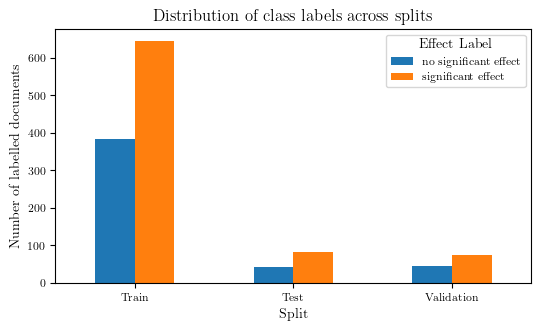

In [47]:
fig, ax = plt.subplots(figsize=set_size("thesis"))

pd.crosstab(df_effect["Effect Label"], df_effect["Split"])[
    ["train", "test", "validation"]
].rename(columns=lambda c: c.capitalize()).T.plot(
    kind="bar",
    rot=0,
    stacked=False,
    title="Distribution of class labels across splits",
    ylabel="Number of labelled documents",
    ax=ax,
)
fig.tight_layout()
fig.savefig(str(PATH_LATEX_PLOT_OUTPUT / "label_distribution.pdf"))

## Prepare Huggingface dataset

To ease the model training process, it makes sense to store the data as a Huggingface dataset:

In [54]:
from datasets import Dataset, DatasetDict, Features, ClassLabel, Value, DatasetInfo

In [55]:
hf_df = df_effect[
    ["PMCID", "PMID", "Split", "Abstract (TS)", "Effect Label Code"]
].rename(
    columns={
        "PMCID": "pmcid",
        "PMID": "pmid",
        "Abstract (TS)": "text",
        "Effect Label Code": "label",
    }
)

In [56]:
features = Features(
    {
        "pmcid": Value(dtype="int32", id=None),
        "pmid": Value(dtype="int32", id=None),
        "text": Value(dtype="string", id=None),
        "label": ClassLabel(
            num_classes=2, names=["no significant effect", "significant effect"]
        ),
    }
)

In [57]:
info = DatasetInfo(
    description="This dataset contains document-level effect significance labels aggregated from the [Evidence Inference 2.0 dataset](http://evidence-inference.ebm-nlp.com/).",
    features=features,
    version="0.0.1",
)

In [58]:
ds_splits = {}
for split in ["train", "validation", "test"]:
    ds_splits[split] = Dataset.from_pandas(
        hf_df.query(f"Split == '{split}'").drop(columns="Split"),
        preserve_index=False,
        features=features,
        info=info,
    )

ds = DatasetDict(ds_splits)
ds

DatasetDict({
    train: Dataset({
        features: ['pmcid', 'pmid', 'text', 'label'],
        num_rows: 1028
    })
    validation: Dataset({
        features: ['pmcid', 'pmid', 'text', 'label'],
        num_rows: 118
    })
    test: Dataset({
        features: ['pmcid', 'pmid', 'text', 'label'],
        num_rows: 123
    })
})

In [59]:
ds.push_to_hub("paul-ww/ei-abstract-significance")

Pushing split train to the Hub.
Resuming upload of the dataset shards.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split validation to the Hub.
Resuming upload of the dataset shards.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

Pushing split test to the Hub.
Resuming upload of the dataset shards.


Pushing dataset shards to the dataset hub:   0%|          | 0/1 [00:00<?, ?it/s]

### Load dataset from the hub

In [60]:
from datasets import load_dataset

ds = load_dataset("paul-ww/ei-abstract-significance")

Extracting data files:   0%|          | 0/3 [00:00<?, ?it/s]

Generating train split:   0%|          | 0/1028 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/118 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/123 [00:00<?, ? examples/s]

Dataset parquet downloaded and prepared to /Users/paul/.cache/huggingface/datasets/paul-ww___parquet/paul-ww--ei-abstract-significance-5ce331037880a5bc/0.0.0/14a00e99c0d15a23649d0db8944380ac81082d4b021f398733dd84f3a6c569a7. Subsequent calls will reuse this data.


  0%|          | 0/3 [00:00<?, ?it/s]